The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
Dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.





In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score

In [57]:
file_path='/home/mina/Desktop/DA/Data-Analysis-Practice/credit_card_freud/creditcard.csv'
credit_card = pd.read_csv(file_path)

In [58]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [59]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We want to see what is proportion of fraud transaction in Class column (0-no fraud/1-fraud) in dataset. We can see that dataset is highly unbalanced.

In [60]:
credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [61]:
class_percentige=credit_card['Class'].value_counts(normalize=True)*100
class_percentige

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Text(0, 0.5, 'Frequency')

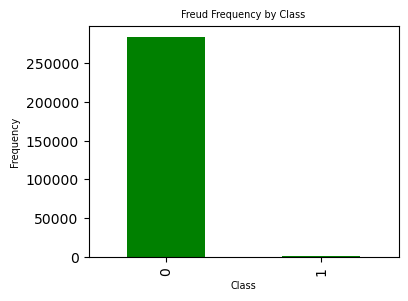

In [62]:
plt.figure(figsize=(4,3))
credit_card['Class'].value_counts().plot(kind='bar',color='green')
plt.title('Freud Frequency by Class',fontsize=7)
plt.xlabel('Class',fontsize=7)
plt.ylabel('Frequency',fontsize=7)

We would like to see distribution of Amount spent per transaction. We can see it is some kind of gama istribution.

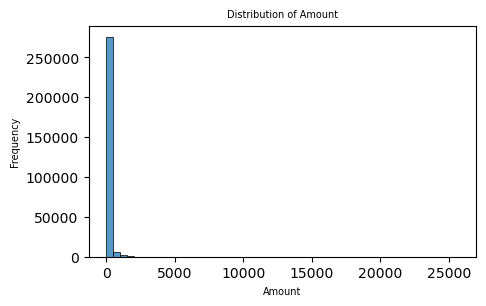

In [63]:
plt.figure(figsize=(5,3))
sns.histplot(credit_card['Amount'], bins=50, kde=False)  # You can change the number of bins
plt.title('Distribution of Amount',fontsize=7)
plt.xlabel('Amount',fontsize=7)
plt.ylabel('Frequency',fontsize=7)
plt.show()

We will normalize Amount column in Dataset.

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normamount = credit_card['Amount'].to_numpy().reshape(-1, 1)
credit_card['normAmount'] = scaler.fit_transform(normamount)

In [65]:
credit_card['normAmount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: normAmount, Length: 284807, dtype: float64

In [66]:
credit_card['Amount'].to_numpy().reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [68]:
credit_card = credit_card.drop(['Time','Amount'],axis=1)
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


For Regresion analysis we need to split Dataset in two groups.


In [69]:
x=credit_card.loc[:,credit_card.columns!='Class']
y=credit_card.loc[:,credit_card.columns=='Class']

In [70]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [71]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


We will check number of rows with fraud transactions.
and we will fix their indexes.

In [72]:
number_records_fraud = len(credit_card[credit_card.Class == 1])
number_records_fraud

492

In [73]:
fraud_indices = np.array(credit_card[credit_card.Class == 1].index)
len(fraud_indices)

492

We will do the same for rows with normal transactions.

In [74]:
number_records_normal=len(credit_card[credit_card.Class==0])
number_records_normal

284315

In [75]:
normal_indices=np.array(credit_card[credit_card.Class==0].index)
normal_indices

array([     0,      1,      2, ..., 284804, 284805, 284806])

As this is example of highly unbalanced Dataset, we will balance dataset with undersample method, so the ratio of classes is 50-50.


We will choose random normal indexes in order to make them equal to the number of fraud indexes.

In [77]:
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices

random_normal_indices = np.array(random_normal_indices)
len(random_normal_indices)

492

In [78]:
type(random_normal_indices)

numpy.ndarray

In [79]:
type(fraud_indices)

numpy.ndarray

We are making new dataset consisting of all fraud indexes and random normal indexes.


In [80]:
under_sample_indeces=np.concatenate([fraud_indices, random_normal_indices])
len(under_sample_indeces)

984

In [81]:
under_sample_data=credit_card.loc[under_sample_indeces,:]

In [82]:
under_sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


We will check number of fraud/no fraud transactions in new dataset.

In [83]:
under_sample_data['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [85]:
print('Percentege of normal transactions:',len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data),'%')
print('Percentege of fraud transactions:',len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data),'%')
print('Total numberd transactions:',len(under_sample_data))

Percentege of normal transactions: 0.5 %
Percentege of fraud transactions: 0.5 %
Total numberd transactions: 984


We will split new dataset for Regression analysis.

In [84]:
x_under_sample=under_sample_data.loc[:,under_sample_data.columns!='Class']
y_under_samle=under_sample_data.loc[:,under_sample_data.columns=='Class']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [88]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/mina/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [89]:
print('Number of transactions in train dataset:',len(x_train))
print('Number of transactions in test dataset:',len(x_test))

Number of transactions in train dataset: 199364
Number of transactions in test dataset: 85443


In [90]:
y_pred = model.predict(x_test)

In [91]:
recall = recall_score(y_test, y_pred)
print(f'Recall score is:{recall}')

Recall score is:0.6190476190476191


We will do the same procedure for balanced dataset.

In [92]:
x_under_sample=under_sample_data.loc[:,under_sample_data.columns!='Class']
y_under_samle=under_sample_data.loc[:,under_sample_data.columns=='Class']

In [93]:
print(len(x_under_sample))

984


In [94]:
x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample=train_test_split(x_under_sample,y_under_samle,test_size=0.3,random_state=0)

In [95]:
print('Number of transactions in train_undersample dataset:',len(x_train_undersample))
print('Number of transactions in test_undersample dataset:',len(x_test_undersample))

Number of transactions in train_undersample dataset: 688
Number of transactions in test_undersample dataset: 296


In [96]:
model_undersample = LogisticRegression()
model_undersample.fit(x_train_undersample, y_train_undersample)

/home/mina/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [97]:
y_pred_undersample = model_undersample.predict(x_test_undersample)

In [98]:
y_pred_undersample

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [99]:
recall_undersample = recall_score(y_test_undersample, y_pred_undersample)
print(f'Recall score is:{recall_undersample}')

Recall score is:0.9115646258503401


Confusion Matrix:
[[147   2]
 [ 13 134]]


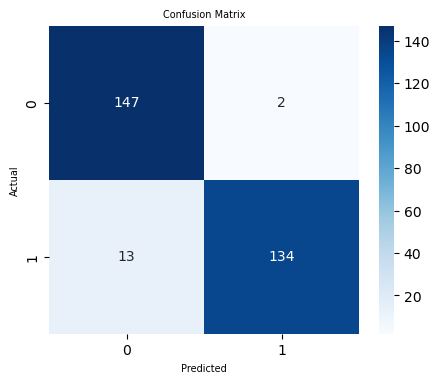

In [100]:
cm = confusion_matrix(y_test_undersample, y_pred_undersample)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted',fontsize=7)
plt.ylabel('Actual',fontsize=7)
plt.title('Confusion Matrix',fontsize=7)
plt.show()

In [101]:
len(x_test_undersample)

296

Now we will test this model (from balanced dataset) on unbalanced sample.

In [108]:
y_prediction = model_undersample.predict(x_test)

In [109]:
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
recall_prediction = recall_score(y_test,y_prediction)
recall_prediction

0.9183673469387755